# Training Data

In [1]:
# Let's first import necessary libraries

import numpy as np

#Import for generating plots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Quick recap

  1. Training data contains features and labels that are ℜ
  2. Model or inference: y = Xw

In [2]:
# Create a dataset of 100 examples with a single feature and a label
# For this construction, we use the following three parameters:
w0 = 4
w1 = 3
n = 100

In [3]:
# Creates a column vector with 100 rows
X = 10 * np.random.random(n, )
X

array([8.77581844, 4.39537829, 1.85552087, 3.21273373, 1.57806581,
       6.10960412, 6.18740909, 6.48980051, 2.18976366, 2.72909123,
       4.93173303, 0.22953874, 7.25029838, 5.88172402, 6.70752024,
       9.58637138, 1.6160015 , 5.27546346, 3.87250681, 1.32768355,
       1.02486564, 6.01944575, 8.70112042, 2.97906737, 4.42697041,
       2.98430218, 7.48290348, 0.22682054, 7.69158892, 9.8635021 ,
       4.4226394 , 0.56534005, 1.70786822, 8.01968522, 9.76853277,
       4.9538356 , 7.05706771, 6.08932293, 4.65141964, 5.34512477,
       1.5338252 , 3.43456282, 2.0979579 , 6.38486216, 6.47015571,
       7.39451494, 0.02409203, 6.00536028, 7.06662029, 4.40083076,
       8.59139601, 2.21323575, 2.15842915, 5.59818296, 3.09410991,
       4.13107   , 2.55792971, 7.46429735, 2.74401953, 6.4119779 ,
       7.5752841 , 3.09911651, 4.7772819 , 1.61391886, 6.08455333,
       0.42155366, 2.31619777, 8.12579395, 6.4142961 , 1.91620704,
       9.46683372, 0.93623735, 2.01569938, 6.74837782, 9.76187

In [4]:
# Obtain y = 4 + 3*x +noise
# Noise is randomly sampled
y = w0 + w1 * X + np.random.randn(n,)

In [5]:
# Examining the shapes of training data for sanity check
print("Shape of the training data feature matrix:", X.shape)
print("Shape of label vector:", y.shape)

Shape of the training data feature matrix: (100,)
Shape of label vector: (100,)


In [6]:
# Dividing the data into training and test set
# We will set aside 20% examples for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
print("Shape of training feature matrix:", X_train.shape)
print("Shape of training label vector:", y_train.shape)

print("Shape of test feature matrix:", X_test.shape)
print("Shape of test label vector:", y_test.shape)

Shape of training feature matrix: (80,)
Shape of training label vector: (80,)
Shape of test feature matrix: (20,)
Shape of test label vector: (20,)


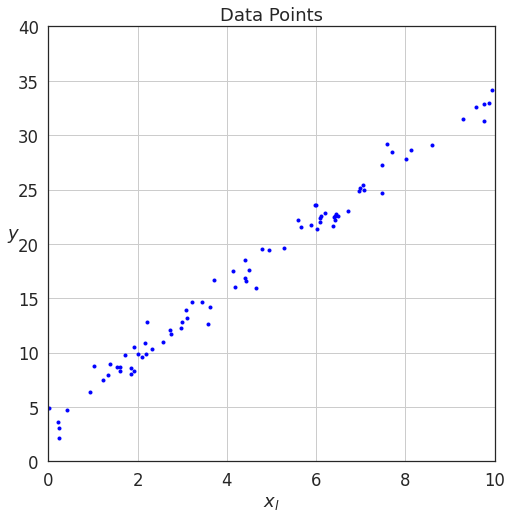

In [8]:
# Visualising the training set
sns.set_style("white")
f = plt.figure(figsize=(8, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.plot(X_train, y_train, "b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_l$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,10,0,40])

plt.show()

We have a training set consisting a single feature so we will fit a simple linear regression model with one feature. It's form is: y = w0 + w1x1
As discussed in the lectures, we add a special dummy feature x0 and set it to 1. We create a helper function for that

In [9]:
def add_dummy_feature(x):
  '''add a dummy feature to the data set.
  Args:
    x : Training dataset
  Returns:
    Training dataset with an addition of dummy feature
  '''
  #np.ones(x.shape[0]) create a vector of 1's having the same number of rows as number of samples in dataset
  return np.column_stack((np.ones(x.shape[0]), x))

In [10]:
# Testing the above function
train_matrix = np.array([[1,2,3], [4,5,6]]) # each feature is a 3D vector.
train_matrix = add_dummy_feature(train_matrix)
train_matrix

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.]])

In [11]:
# Applying the function to X_train
X_train = add_dummy_feature(X_train)
X_train

array([[1.        , 4.13107   ],
       [1.        , 1.23195916],
       [1.        , 7.48290348],
       [1.        , 2.0979579 ],
       [1.        , 1.91620704],
       [1.        , 9.58637138],
       [1.        , 1.5338252 ],
       [1.        , 0.24711055],
       [1.        , 2.72909123],
       [1.        , 2.01569938],
       [1.        , 0.22953874],
       [1.        , 6.00536028],
       [1.        , 4.18583709],
       [1.        , 7.69158892],
       [1.        , 6.98423901],
       [1.        , 6.10960412],
       [1.        , 2.31619777],
       [1.        , 0.42155366],
       [1.        , 4.9538356 ],
       [1.        , 1.6160015 ],
       [1.        , 4.40083076],
       [1.        , 9.76853277],
       [1.        , 6.48980051],
       [1.        , 5.97531322],
       [1.        , 0.22682054],
       [1.        , 1.32768355],
       [1.        , 6.39070178],
       [1.        , 2.98430218],
       [1.        , 4.7772819 ],
       [1.        , 5.88172402],
       [1.

# Model

In [12]:
def predict(X,w):
  '''prediction of output label for a given input.
  Args:
    X: Feature matrix of shape (n, m+1)
    w: Weight vector of shape (m+1, n)

  returns:
    y: Predicted label vector of shape (n,).
  '''
  #check to make sure the feature matric and weight vector have compatible shapes
  assert X.shape[-1] == w.shape[0], "X and w don't have compatible dimensions"
  return X @ w

In [13]:
def preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    X_train = add_dummy_feature(X_train)
    return X_train, X_test, y_train, y_test

In [14]:
def generate_examples(n):
    X = 10 * np.random.random(n, )
    y = w0 + w1 * X
    return preprocess(X, y)

In [15]:
# Test it with the examples generated using above function
X_train, X_test, y_train, y_test = generate_examples(100)
y_hat =  predict (X_train, np.random.rand(2,))
y_hat

array([1.07989253, 1.64582022, 2.85940666, 2.15750017, 1.29430777,
       3.88559986, 3.77942966, 2.63136718, 1.56215327, 3.96658925,
       4.69263919, 3.77689894, 4.83006925, 2.30849675, 3.62043699,
       5.04304367, 0.7002584 , 1.34018314, 3.31037592, 0.88442858,
       1.41626622, 1.69066465, 0.70829551, 2.19917138, 2.35447729,
       1.93630902, 2.49340004, 4.94595832, 1.07666804, 2.14210312,
       3.77718104, 4.10271519, 4.33597891, 2.26669237, 1.72159525,
       1.446197  , 2.82810565, 1.58279214, 1.37553043, 4.4573853 ,
       1.12507792, 3.00757443, 4.08669045, 3.50274022, 3.69439161,
       2.22824936, 3.52195017, 0.88763713, 5.13927241, 1.35565474,
       0.94989665, 2.42875278, 4.77831916, 3.60128943, 4.53916884,
       2.36402519, 2.11983553, 1.50906652, 3.68580602, 1.69084254,
       3.9538013 , 4.85232884, 2.62285915, 4.03640961, 1.55825142,
       1.42468098, 3.86750456, 3.08390029, 1.29838735, 2.53909525,
       2.50819747, 2.32199461, 1.85185628, 4.67352535, 5.41236

# Loss

In [16]:
def loss(X,y,w=None):
  '''Calculates loss for a model based on known labels

  Args:
    x: Feature matrix for given inputs
    y: Output label vector as predicted by the given model
    w: weight vector
  
  Returns:
    Loss
  '''
  if w is None:
        w = np.zeros(X.shape[1])
  e = predict(X,w) - y
  return (1/2) * (np.transpose(e) @ e)

In [17]:
X = np.array([[1,3,2,5],[1,9,4,7]])
y = np.array([6,11])
w = np.array([1,1,1,1])
loss(X, y, w)

62.5

In [18]:
# RMSE 
def rmse(X, y):
    return np.sqrt(2/X.shape[0] * loss(X, y))

In [19]:
rmse(X_train, y_train)

19.299111139887305

In [20]:
X_train, X_test, y_train, y_test = generate_examples(100)
loss(X_train, y_train, np.array([3,4]))  #Since weight vector is (3,4), there's no loss

1067.9069718286978

In [21]:
# Generating a weight vector
w = np.random.rand(2,)

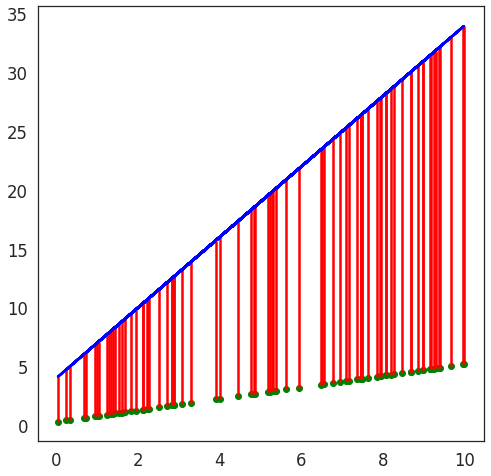

In [22]:
y_new = predict(X_train, w)
fig, axes = plt.subplots(figsize=(8,8))
axes.plot(X_train[:,1], y_train, c='b', label='Training')
axes.scatter(X_train[:,1], y_new, c='g', label='Error')
axes.vlines(X_train[:,1], y_new, y_train, colors="r", label="loss")

# Optimization

Normal equation 
 The weight vector is estimated by matrix multiplication of pseudo-inverse of feature matrix and the label vector
 The vectorised implementation is fairly straightforward

*   We make use of np.linalg.pinv for calculating pseudoinverse of the feature matrix

In [23]:
def normal_equation(X,y):
  '''Estimates parameters of the linear regression model with normal equation
  Args:
    X: Feature matrix for given inputs
    y: Actual label vector

  Returns:
    Weight vector
  '''
  return np.linalg.pinv(X) @ y

In [24]:
normal_equation(X_train, y_train)

array([4., 3.])

Gradient Descent (GD)

GD is implemented as follows:
*   randomly initialise w to 0
*   iterate until *convergence*:
  *   calculate partial derivative w.r.t weight vector
  *   calculate new values of weights
  *   update weights to new values simultaneously

we use number of epochs as a convergence criteria in this implementation

In [25]:
# Setting a learning rate
lr = 0.0001

In [26]:
def calculate_gradient(X, y, w):
  '''Calculates gradients of loss function w.r.t weight vector on training set.
  Args:
    X: feature matrix for training data
    y: label vector for training data
    w: weight vector

  Returns:
    A vector of gradients
  '''
  return np.transpose(X) @ (predict(X,w) - y)

In [27]:
def update_weights(w, grad, lr):
  '''Updates the weights based on the gradient of the loss function
  Weight updates are carried out with the following formula:
    w_new := w_old - lr*grad

  Args:
    1. w: weight vector
    2. grad: gradient of loss w.r.t w
    3. lr: learning rate
  
  Returns:
    Updated weight vector
  '''
  return (w-lr*grad)

In [28]:
# Implementing GD 

def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epochs:int):
  '''Estimates parameters of linear regression model through gradient descent.
  Args:
    X: Feature matrix for training data
    y: label vector for training data
    lr: learning rate
    num_epochs: number of training steps

  Returns:
    weight vector: final weight vector
    error vector across different iterations weight vectors across different iterations
  '''

  w_all = [] #all parameters across iterations
  err_all = [] #all errors across iterations

  #parameter vector initialised to [0,0]
  w = np.zeros((X.shape[1]))

  #gradient descent loop
  print()
  for i in np.arange(0, num_epochs):
    w_all.append(w)

    #calculate error due to the current weight vector: Note that here we use loss function to calculate the loss 
    err_all.append(loss(X,y,w))

    #gradient calculation
    dJdW = calculate_gradient(X, y, w)

    #print stats every 100 iterations
    if (i%100) == 0:
      print('Iteration #: %d, loss: %4.2f' %(i, err_all[-1]))

    #weight vector update
    w = update_weights(w, dJdW, lr)

  return w, err_all, w_all

In [29]:
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel("iteration #")
  plt.ylabel("Loss: $J(\mathbf{w})$")


Iteration #: 0, loss: 18565.06
Iteration #: 100, loss: 84.45
Iteration #: 200, loss: 56.16
Iteration #: 300, loss: 37.34
Iteration #: 400, loss: 24.83
Iteration #: 500, loss: 16.51
Iteration #: 600, loss: 10.98
Iteration #: 700, loss: 7.30
Iteration #: 800, loss: 4.86
Iteration #: 900, loss: 3.23
Iteration #: 1000, loss: 2.15
Iteration #: 1100, loss: 1.43
Iteration #: 1200, loss: 0.95
Iteration #: 1300, loss: 0.63
Iteration #: 1400, loss: 0.42
Iteration #: 1500, loss: 0.28
Iteration #: 1600, loss: 0.19
Iteration #: 1700, loss: 0.12
Iteration #: 1800, loss: 0.08
Iteration #: 1900, loss: 0.05


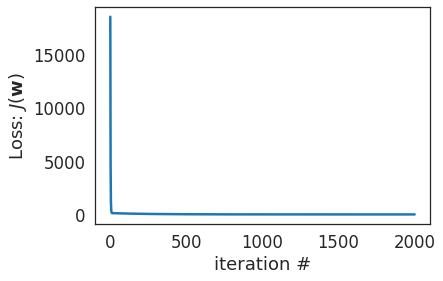

In [30]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.0001, num_epochs=2000)
plot_learning_curves(err_all)

Learning Rate and Convergence

Let's vary the learning rate and observe the change in the convergence characteristics of GD
We will use:
*   α = {1e-6,1e-4,1e-1} to run GD for 2000 epochs each
*   Compare the convergence characteristics


Iteration #: 0, loss: 18565.06
Iteration #: 100, loss: 10355.68
Iteration #: 200, loss: 5801.00
Iteration #: 300, loss: 3273.89
Iteration #: 400, loss: 1871.66
Iteration #: 500, loss: 1093.49
Iteration #: 600, loss: 661.55
Iteration #: 700, loss: 421.69
Iteration #: 800, loss: 288.40
Iteration #: 900, loss: 214.23
Iteration #: 1000, loss: 172.86
Iteration #: 1100, loss: 149.69
Iteration #: 1200, loss: 136.62
Iteration #: 1300, loss: 129.15
Iteration #: 1400, loss: 124.78
Iteration #: 1500, loss: 122.15
Iteration #: 1600, loss: 120.47
Iteration #: 1700, loss: 119.32
Iteration #: 1800, loss: 118.48
Iteration #: 1900, loss: 117.79


Text(0.5, 1.0, 'lr=1e-6')

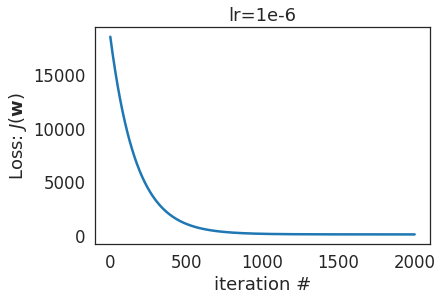

In [31]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=1e-6, num_epochs=2000)
plot_learning_curves(err_all)
plt.title("lr=1e-6")

In [32]:
t0, t1 = 200, 100000
def learning_schedule(t):
  return t0/(t+t1)

In [33]:
# Mini Batch Gradient Descent
# The ket idea here is to perform weight updates by computing gradient on batches of small number of examples


def mini_batch_gd(X:np.ndarray, y:np.ndarray, sum_iters:int, minibatch_size:int):
  '''Estimates parameters of linear regression model through GD
  Args:
    1. X: Feature matrix for training data
    2. y: Label vector for training data
    3. num_iters: Number of iterations

  Returns:
    Weight vector: Final weight vector
    Error vector across different iterations 
    Weight vectors across different iterations
    '''
  w_all = [] #all parameters across iterations
  err_all = [] #error across iterations

  #parameter vector initialised to [0,0]
  w = np.zeros((X.shape[1]))
  t = 0

  for epoch in range(sum_iters):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, X.shape[0], minibatch_size):
      t += 1
      xi = X_shuffled[i:i+minibatch_size]
      yi = y_shuffled[i:i+minibatch_size]
      err_all.append(loss(xi,yi,w))

      gradients = 2/minibatch_size * calculate_gradient(xi,yi,w)
      lr = learning_schedule(t)

      w = update_weights(w, gradients, lr)
      w_all.append(w)

    return w, err_all, w_all

In [34]:
# Testing above function

minibatch_size = 10
sum_iters = 40

X_train, X_test, y_train, y_test = generate_examples(100)
w, err_all, w_all = mini_batch_gd(X_train, y_train, sum_iters, minibatch_size)

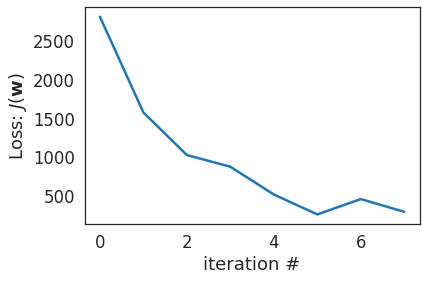

In [35]:
plot_learning_curves(err_all)

In [36]:
#Stochastic Gradient Descent
# The key here is to perform weight updates by computing gradient on one example at a time
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
  '''Estimates parameters of linear regression model through gradient descent
 
  Args:
    1. X: Feature matrix for training data
    2. y: Label vector for training data
    3. num_epochs: Number of epochs
  
  Returns:
    Weight vector: Final weight vector
    Error vector across different iterations
    Weight vectors across different iterations
  '''
  w_all = [] # all paramters across iterations
  err_all = [] # error across iterations

  # Parameter vector intitialised to [0,0]
  w = np.zeros((X.shape[1]))
  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index:random_index + 1]
      yi = y[random_index:random_index + 1]
      err_all.append(loss(xi, yi, w))

      gradients = 2*calculate_gradient(xi,yi,w)
      lr = learning_schedule(epoch * X.shape[0] + i)

      w = update_weights(w, gradients, lr)
      w_all.append(w)
  return w, err_all, w_all


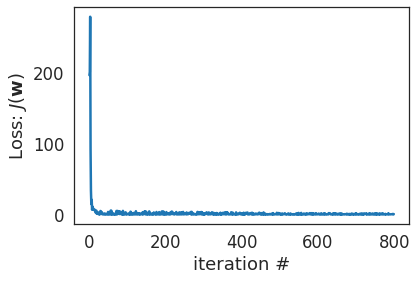

In [37]:
w, err_all, w_all = sgd(X_train, y_train, 10)
plot_learning_curves(err_all)